# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in datasets
ratings_file = '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/ratings.csv'
books_file = '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/books.csv'
tags_file = '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/book_tags.csv'
tags_ref_file = '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/tags.csv'

ratings = pd.read_csv(ratings_file)
books = pd.read_csv(books_file)
tags = pd.read_csv(tags_file)
tags_ref = pd.read_csv(tags_ref_file)

## Exploring Interactions

First let's look at the ratings dataset and explore it's contents.

In [3]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [5]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [6]:
# calculate mean rating for all books in ratings df
ratings['rating'].mean()

3.8565335989797873

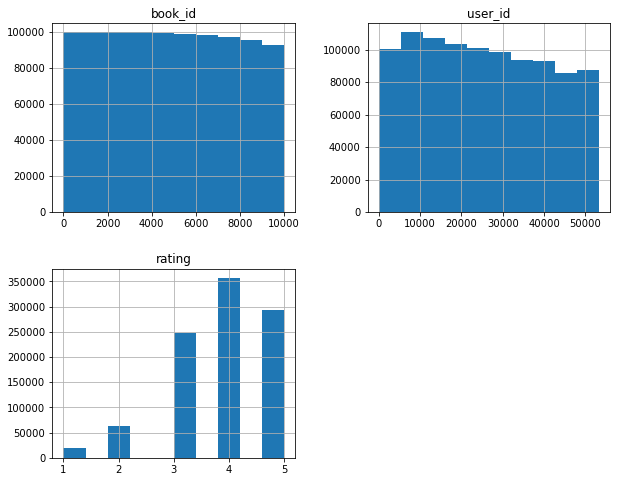

In [7]:
# plot distributions
_ = ratings.hist(figsize=(10, 8))

In [8]:
ratings.value_counts('user_id')

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
42219      2
21323      2
42222      2
28673      2
9253       2
Length: 53424, dtype: int64

In [9]:
temp_df = ratings.value_counts('user_id').rename_axis('user_id').reset_index(name='num_ratings')

In [10]:
temp_df.head()

,user_id,num_ratings
0,12874,200
1,30944,200
2,52036,199
3,12381,199
4,28158,199


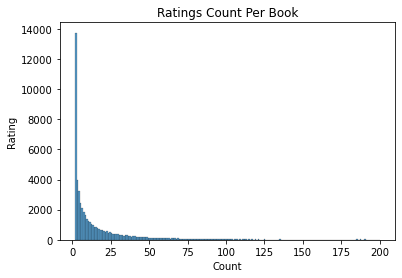

In [11]:
# plot the distribution of # of ratings per book
_ = sns.histplot(x='num_ratings', data=temp_df)
_ = plt.title('Ratings Count Per Book')
_ = plt.xlabel('Count')
_ = plt.ylabel('Rating')

In [12]:
ratings.value_counts('book_id')

book_id
5000    100
3315    100
3313    100
3312    100
3311    100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Length: 10000, dtype: int64

In [13]:
temp_df2 = ratings.value_counts('book_id').rename_axis('book_id').reset_index(name='num_ratings')

In [14]:
temp_df2.head()

,book_id,num_ratings
0,5000,100
1,3315,100
2,3313,100
3,3312,100
4,3311,100


In [15]:
len(temp_df2.loc[temp_df2['num_ratings'] == 100])

7456

In [16]:
len(temp_df2)

10000

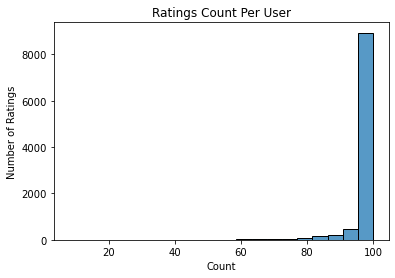

In [17]:
# plot the distribution of # of ratings per user
_ = sns.histplot(x='num_ratings', data=temp_df2, bins=20)
_ = plt.title('Ratings Count Per User')
_ = plt.xlabel('Count')
_ = plt.ylabel('Number of Ratings')

As we can see, each user rated somewhere between 2 and 200 books 

## Exploring Books Data

Now let's look at the books dataset and explore it's contents.

In [18]:
pd.set_option('display.max_columns', None)
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [19]:
# calculate mean rating for all books
books['average_rating'].mean()

4.002191000000001

This is the mean rating for all Goodreads users. Compared to the mean of the ratings in our ratings dataset, it is higher by about 0.15. This is worth noting moving forward.

In [20]:
books.loc[books['original_title'] == 'Twilight']

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
4233,4234,93724,93724,2349900,38,60724692,9.780061e+12,Meg Cabot,2005.0,Twilight,"Twilight (The Mediator, #6)",eng,4.26,32489,34286,979,245,982,5446,10693,16920,https://images.gr-assets.com/books/1327959055m...,https://images.gr-assets.com/books/1327959055s...
7046,7047,32453,32453,1049922,62,747236380,9.780747e+12,"Leigh Nichols, Dean Koontz",1984.0,Twilight,The Servants of Twilight,eng,3.81,14476,15878,274,191,1017,4824,5482,4364,https://images.gr-assets.com/books/1327999566m...,https://images.gr-assets.com/books/1327999566s...
8353,8354,252938,252938,245106,41,60827645,9.780061e+12,Erin Hunter,2006.0,Twilight,"Twilight (Warriors: The New Prophecy, #5)",en-US,4.30,15604,16704,361,138,473,2514,4665,8914,https://images.gr-assets.com/books/1363786463m...,https://images.gr-assets.com/books/1363786463s...


As we can see some original titles are used more than once, so we will use the title feature instead.

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

There appear to be null values in 5 of the columns.

In [22]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


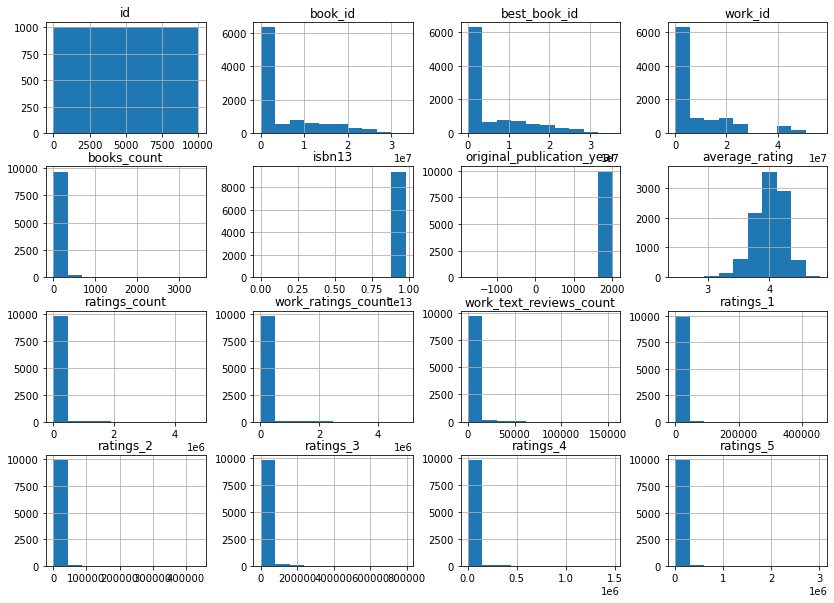

In [23]:
# plot distributions
_ = books.hist(figsize=(14, 10))

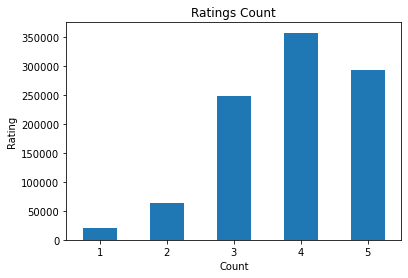

In [24]:
# plot counts of each rating
_ = ratings['rating'].value_counts().sort_index().plot(kind = 'bar')
_ = plt.title('Ratings Count')
_ = plt.xlabel('Count')
_ = plt.ylabel('Rating')
_ = plt.xticks(rotation = 0)

Most users give high ratings, with 4 being the most common.

## Exploring Book Tags

In [25]:
tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [26]:
tags.shape

(999912, 3)

In [27]:
tags_ref.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [28]:
tags_ref.shape

(34252, 2)

In [29]:
# merge tags and tags_ref into 1 df
tags_df = pd.merge(tags, tags_ref, on='tag_id')

In [30]:
tags_df.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [31]:
tags_df.shape

(999912, 4)

The new tags_df is the same length as tags, thus it is simply just tags with an extra row containing the tag_name which will be helpful in reducing the number of tags significantly.

In [32]:
tags_df['tag_name'].value_counts()

to-read                   9983
favorites                 9881
owned                     9858
books-i-own               9799
currently-reading         9776
                          ... 
chiaverini                   1
przeczytane-kilka-razy       1
self-experimentation         1
boutique-law-firm            1
project-showdown             1
Name: tag_name, Length: 34252, dtype: int64

In [33]:
temp_df3 = tags_df.value_counts('tag_name').rename_axis('tag_name').reset_index(name='num_tags')
temp_df3.head()

,tag_name,num_tags
0,to-read,9983
1,favorites,9881
2,owned,9858
3,books-i-own,9799
4,currently-reading,9776


We are looking to get genres from the book tags. After referencing the Goodreads website, they give a small list of common genres. We can use these names and search for them among the tags, then reduce the tags_df dataframe to contain only those genre tags.

In [34]:
# make list of genres on goodreads website
genres = ['art', 'biography', 'business', 'chick-lit', 'children', 'christian', 'classics', 'comedy', 'comic',\
          'contemporary', 'cookbook', 'crime', 'fantasy', 'fiction', 'graphic', 'history', 'historical-fiction',\
          'horror', 'manga', 'memoir', 'music', 'mystery', 'non-fiction', 'paranormal', 'philosophy', 'poetry',\
          'psychology', 'religion', 'romance', 'science', 'science-fiction', 'self-help', 'suspense', 'spirituality',\
          'sports', 'thriller', 'travel', 'young-adult']

In [35]:
# let's see how many tags are given to each book
genres_df = temp_df3[temp_df3['tag_name'].isin(genres)]
genres_df

,tag_name,num_tags
7,fiction,9097
24,contemporary,5287
36,fantasy,4259
37,romance,4251
44,mystery,3686
48,young-adult,3630
60,classics,2785
70,historical-fiction,2590
73,thriller,2522
76,suspense,2419


In [36]:
tags_df = tags_df[tags_df['tag_name'].isin(genres)]
tags_df = tags_df.sort_values(by='count', axis=0, ascending=False)
tags_df = tags_df.groupby('goodreads_book_id').head(3).reset_index(drop=True)
tags_df

,goodreads_book_id,tag_id,count,tag_name
0,3,11305,47478,fantasy
1,5907,11305,41786,fantasy
2,15881,11305,39501,fantasy
3,5,11305,39330,fantasy
4,6,11305,38378,fantasy
...,...,...,...,...
29883,35233,26138,1,romance
29884,823412,26816,1,science
29885,13151637,11743,1,fiction
29886,1191,11743,1,fiction


In [37]:
tags_df.loc[tags_df['goodreads_book_id'] == 3]

,goodreads_book_id,tag_id,count,tag_name
0,3,11305,47478,fantasy
45,3,33114,14984,young-adult
60,3,11743,13239,fiction


In [38]:
tags_df.shape

(29888, 4)

So far I have made a dataframe that contains up to 3 rows per book_id, containing the 3 most tagged genres with their corresponding value counts. I need to get these genre tags into 3 columns, genre1, genre2, genre3 so that there is only 1 row per book_id. I then need to merge this tags_df with the books df on the appropriate book id. Then I can go through the rest of my code and find the right spot to limit the recommendations to books that share a genre with the user inputted books

In [39]:
# create dataframe with 4 columns: id, and 3 genre columns
tags_df_new = tags_df[['goodreads_book_id']].drop_duplicates(ignore_index=True)
for i in range(3):
    name = 'genre' + str(i+1)
    tags_df_new[name] = 'none'

# get list of id's in tags_df
id_list = tags_df['goodreads_book_id'].unique().tolist()
x = 0

# for loop that fills in genre1, genre2, genre3 columns
for item in id_list:
    temp = tags_df.loc[tags_df['goodreads_book_id'] == item]
    tag_list = temp['tag_name'].tolist()
    for i in range(len(tag_list)):
        tags_df_new.iloc[x, i+1] = tag_list[i]
    x+=1
    
tags_df_new.head(10)

,goodreads_book_id,genre1,genre2,genre3
0,3,fantasy,young-adult,fiction
1,5907,fantasy,classics,fiction
2,15881,fantasy,young-adult,fiction
3,5,fantasy,young-adult,fiction
4,6,fantasy,young-adult,fiction
5,136251,fantasy,young-adult,fiction
6,1,fantasy,young-adult,fiction
7,1885,classics,fiction,romance
8,4671,classics,fiction,historical-fiction
9,34,fantasy,classics,fiction


In [40]:
# Now we need to merge tags_df_new with the books dataframe on the id values
books = pd.merge(books, tags_df_new, left_on='book_id', right_on='goodreads_book_id')

In [41]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,genre1,genre2,genre3
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,young-adult,fiction,fantasy
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,fantasy,young-adult,fiction
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,young-adult,fantasy,fiction
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,classics,historical-fiction,young-adult
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,classics,fiction,historical-fiction


We now have a books dataset with up to 3 genre tags per book. Later we can use these tags to limit our recommendations to only books containing the genres within the user input.

Now let's create an average rating per genre dataframe.

In [42]:
avg_rating = []
for item in genres:
    temp = books.loc[(books['genre1'] == item) | (books['genre2'] == item) | (books['genre3'] == item)]
    avg_rating.append(temp['average_rating'].mean())

In [45]:
genres_df['avg_rating'] = avg_rating
genres_df

<ipython-input-45-6d536ee11b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['avg_rating'] = avg_rating


,tag_name,num_tags,avg_rating
7,fiction,9097,3.946525
24,contemporary,5287,4.012794
36,fantasy,4259,3.987500
37,romance,4251,3.832024
44,mystery,3686,4.141648
48,young-adult,3630,4.190918
60,classics,2785,4.017840
70,historical-fiction,2590,4.014550
73,thriller,2522,4.225890
76,suspense,2419,3.910813


## Dropping Rows from Both Dataframes

We need to drop some rows from the books dataframe, namely those that don't have a year column as well as rows with duplicate title names. Likewise, we need to drop the corresponding ratings to those books in the ratings column.

In [42]:
# create df that stores books with no year value
dropped_books = books.loc[books['original_publication_year'].isna()]

In [43]:
# create df that stores rows with duplicate titles
duplicates = pd.DataFrame()
mask = books.duplicated(subset='title', keep='first')
df_keep = books.loc[~mask]
duplicates = duplicates.append(books.loc[mask])

In [44]:
# merge these two df's and create a list of id's that will be dropped
drops = pd.concat([dropped_books, duplicates])
drop_list = drops['id'].tolist()

In [45]:
len(drop_list)

57

In [46]:
# drop the books from main df
books = books.loc[books['original_publication_year'].notna()]
books = books.drop_duplicates(subset='title')

In [47]:
# drop all rows from rating df with dropped book_id
ratings = ratings[~(ratings['book_id'].isin(drop_list))]

Now the dataframes are clear of problematic rows and can be used for modeling.

In [48]:
# save new dataset
books.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/books_cleaned.csv', index = False)
ratings.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Books/Data/ratings_cleaned.csv', index = False)